In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
y, sr = librosa.load('/Users/madhuryak/Desktop/genres/reggae/reggae.00067.au')

In [4]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)

audio_file, _ = librosa.effects.trim(y)

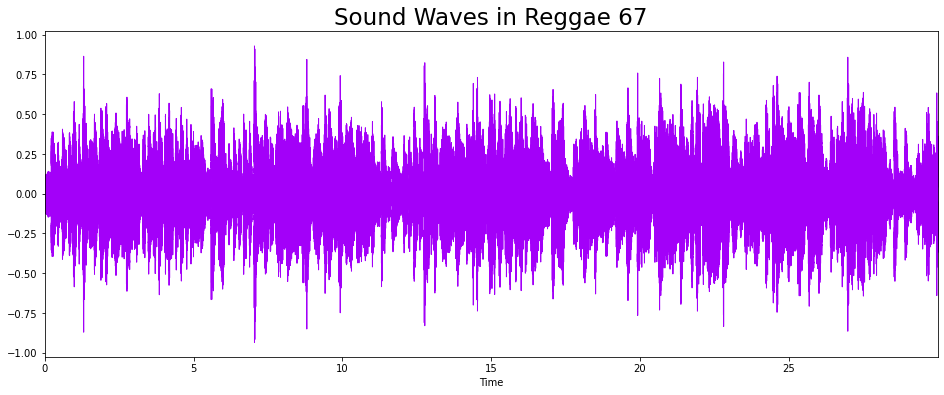

In [5]:
# 2D Representation of Wave form of the audio file

plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 67", fontsize = 23);

In [6]:
# Fourier Transform

# Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies

# Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, 
# which is approx. the log scale of amplitudes.

# Default FFT window size
# FFT window size
n_fft = 2048 

# number audio of frames between STFT columns (looks like a good default)
hop_length = 512 

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

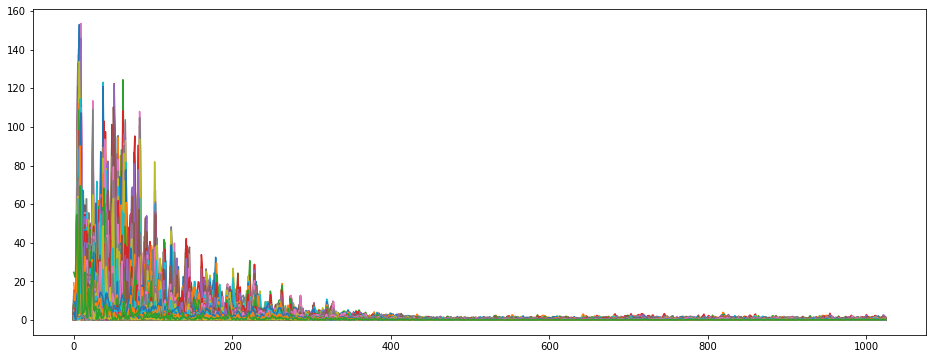

In [7]:
plt.figure(figsize = (16, 6))
plt.plot(D);

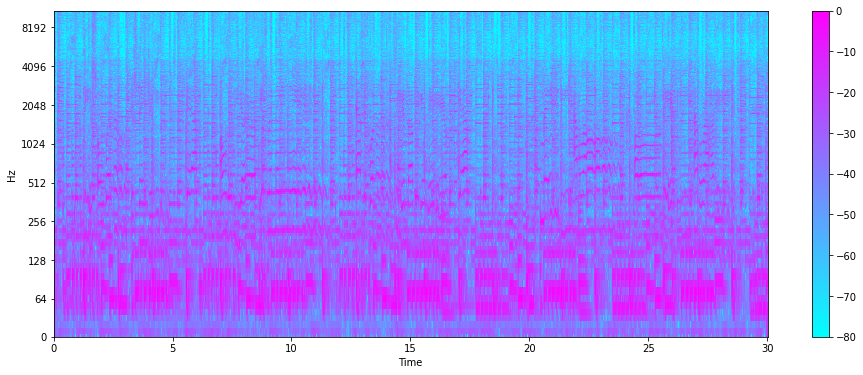

In [8]:
# Spectrogram

# A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. 
# When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

#Here we convert the frequency axis to a logarithmic one.

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')

plt.colorbar();

In [9]:
# Zero Crossing Rate

# the rate at which the signal changes from positive to negative or back.

# Total zero_crossings in the imported audio file
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

40055


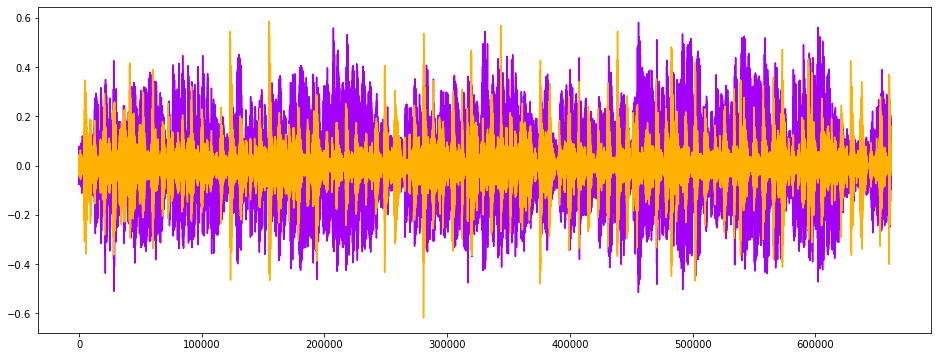

In [10]:
#Harmonics and Perceptrual

#Harmonics are characteristichs that human years can't distinguish (represents the sound color)
#Perceptrual understanding shock wave represents the sound rhythm and emotion

y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9')
plt.plot(y_perc, color = '#FFB100')

In [11]:
# Spectral Centroid

# indicates where the centre of mass for a sound is located and is calculated as the weighted mean of 
# the frequencies present in the sound.

# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [ 708.63384154 1298.59072768 2241.46701573 ... 1520.95424277 1363.49984447
 1173.31664826] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


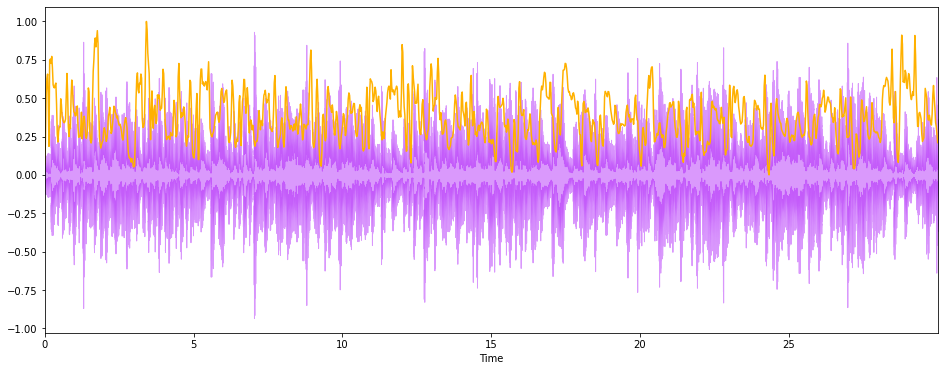

In [12]:
#Plotting the Spectral Centroid along the waveform

plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

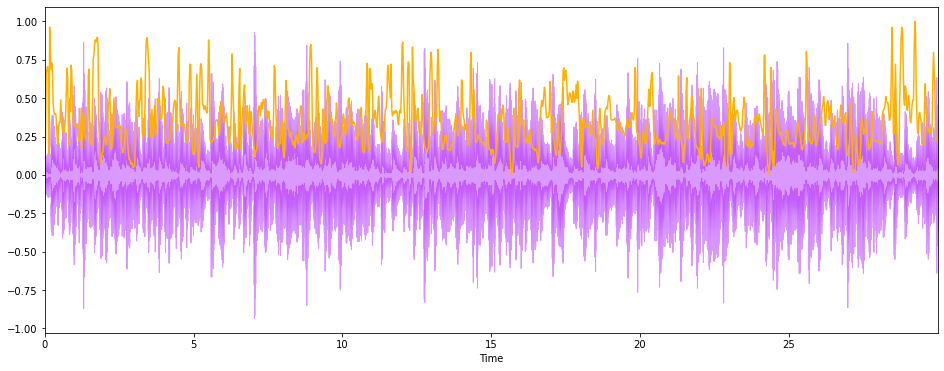

In [13]:
# Spectral Rolloff

# It is a measure of the shape of the signal. 
# It represents the frequency below which a specified percentage of the total spectral energy

# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9')
plt.plot(t, normalize(spectral_rolloff), color='#FFB100')

In [14]:
#    Feature Extraction From Dataset (Audio Files)

header = 'filename chroma_stft_mean chroma_stft_var rms_mean rms_var spect_cent_mean spect_cent_var spect_bw_mean spect_bw_var rolloff_mean rolloff_var zcr_mean zcr_var harmony_mean harmony_var perceptr_mean percept_r tempo'
for i in range(1, 21):
    header += f' mfcc{i}_mean'
    header += f' mfcc{i}_var'
header += ' label'
header = header.split()

In [15]:
header

['filename',
 'chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spect_cent_mean',
 'spect_cent_var',
 'spect_bw_mean',
 'spect_bw_var',
 'rolloff_mean',
 'rolloff_var',
 'zcr_mean',
 'zcr_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'percept_r',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var',
 'label']

In [16]:
len(header)

59

In [17]:
import csv
import os
file = open('/Users/madhuryak/Desktop/features.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/Users/madhuryak/Desktop/genres/{g}'):
        offs=0
        y,sr=librosa.load(f'/Users/madhuryak/Desktop/genres/{g}/{filename}')
        length=librosa.get_duration(y=y,sr=sr)
        while offs<=length:
            songname = f'/Users/madhuryak/Desktop/genres/{g}/{filename}'
            y, sr = librosa.load(songname, mono=True, offset=offs, duration=3)
            length=librosa.get_duration(y=y,sr=sr)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            har=librosa.effects.harmonic(y=y)
            per=librosa.effects.percussive(y=y)
            tempo=librosa.beat.tempo(y=y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            to_append = f'{filename} {length} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(har)} {np.var(har)} {np.mean(per)} {np.var(per)} {tempo}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
                to_append += f' {np.var(e)}'
            to_append += f' {g}'
            file = open('/Users/madhuryak/Desktop/features.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
            offs+=3

In [18]:
data=pd.read_csv('/Users/madhuryak/Desktop/features.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [19]:
data.shape

(9990, 60)

Text(0, 0.5, 'BPM')

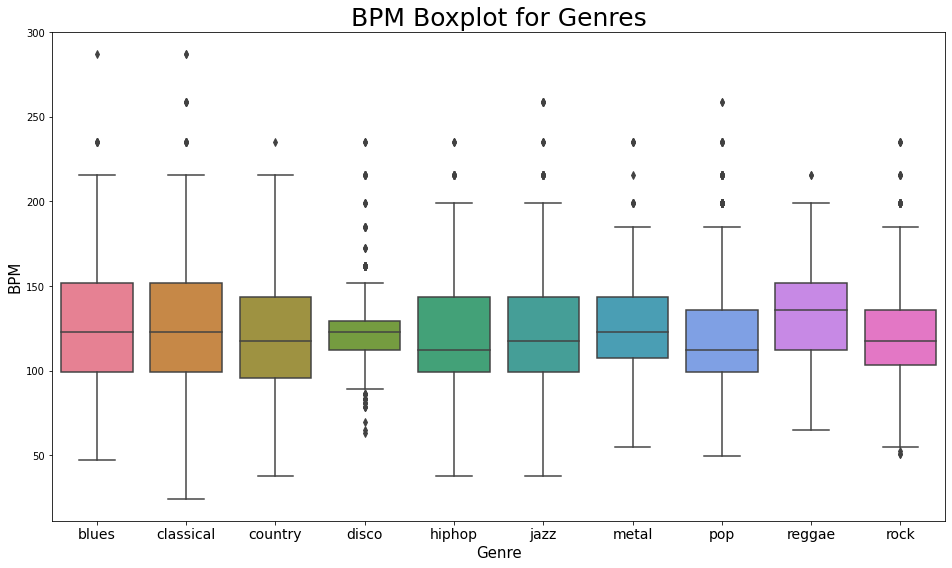

In [21]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)